In [1]:
# instalamos las librerías necesarias
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install sklearn

In [2]:
# para que jupyter muestre gráficos
%matplotlib inline

# importar librerías
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np
from sklearn.datasets._samples_generator import make_blobs

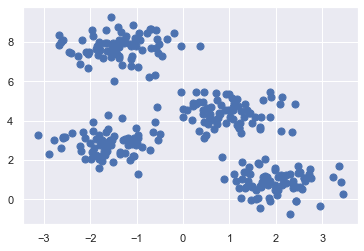

In [3]:
# generar datos para gráfico
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# dibujar gráfico
plt.scatter(X[:,0],X[:,1],s=50)

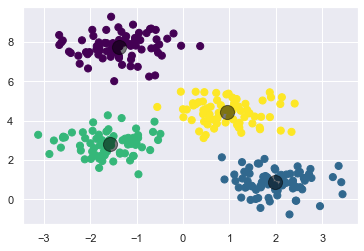

In [4]:
# importamos modelo
from sklearn.cluster import KMeans

# generamos el modelo con K=4
kmeans = KMeans(n_clusters=4)

# ajustamos (que en este caso significa iterar los centroides)
kmeans.fit(X)

# generamos las asignaciones de cada elemento a un centroid
y_kmeans = kmeans.predict(X)

# visualizamos los resultados
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200 ,alpha=0.5)

In [5]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    
    labels = kmeans.fit_predict(X)
    
    # Grafica los datos de entrada 
    ax = ax or plt.gca() 
    ax.axis( 'equal') 
    ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis', zorder=2) 


    # Grafica la representacion de K—Mean como circulos 
    centers = kmeans.cluster_centers_ 
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]

    for c, r in zip(centers, radii): 
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3, alpha=0.5,zorder=1))

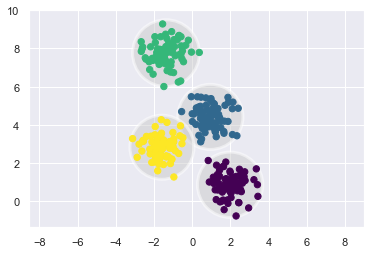

In [6]:
# ajustamos el modelo
kmeans = KMeans(n_clusters=4, random_state=0)

# graficamos
plot_kmeans(kmeans, X)

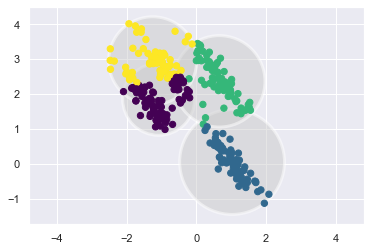

In [7]:
# generamos datos que se sobreponen
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2,2))

# ajustamos el mismo modelo con K=4
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

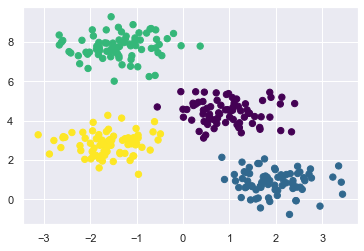

In [8]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis')

In [9]:
from turtle import width
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """ Dibuja una elipse dada una posicion y covarianza"""
    ax = ax or plt.gca()

    #convert covariance to principal axes
    if covariance.shape == (2,2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)

    if label:
        ax.scatter( X[:,0], X[:,1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter( X[:,0], X[:,1], s=40, zorder=2)

    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()

    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

C:\Users\jhonn\AppData\Local\Temp\ipykernel_18524\3404183253.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


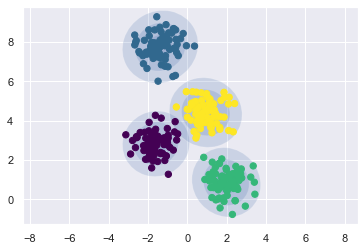

In [10]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X)
plot_gmm(gmm, X)

C:\Users\jhonn\AppData\Local\Temp\ipykernel_18524\3404183253.py:19: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))


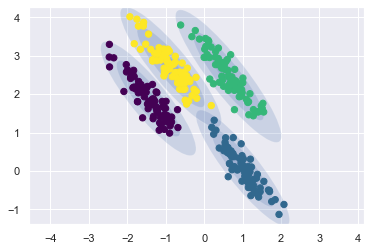

In [11]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full')
plot_gmm(gmm, X_stretched)

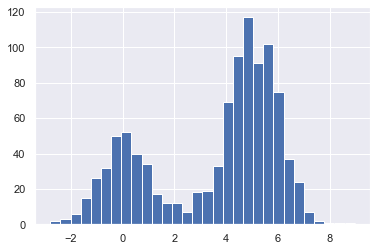

In [12]:
def generar_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f*N):] += 5
    return x

# generamos los datos
x = generar_data(1000)

# graficamos
hist = plt.hist(x,bins=30)

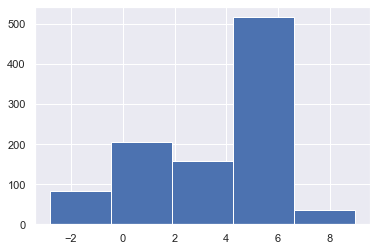

In [13]:
# generamos los datos
x = generar_data(1000)

# graficamos
hist = plt.hist(x, bins=5)

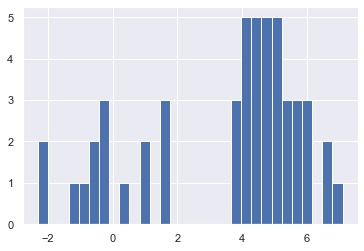

In [16]:
# generamos los datos
x = generar_data(50)

# graficamos
hist = plt.hist(x, bins=30)


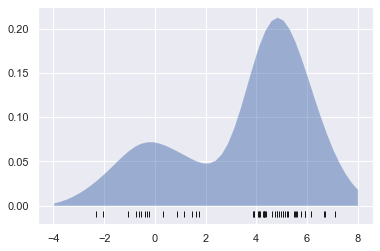

In [18]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

# generamos los datos
x_d = np.linspace(-4, 8, 50) # notar que solo generamos 50

# instanciamos y ejecutamos el modelo KDE
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:,None])

logprob = kde.score_samples(x_d[:,None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x,-0.01), '|k')
plt.ylim=(-0.02, 0.22)